<a href="https://colab.research.google.com/github/SidSolanki28/Predict-Sales-by-Advertising-Ads/blob/master/Advertising_Ads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

機械学習における基本的な実装の手順
1. データの読み込み
2. 訓練データと評価データの準備
3. アルゴリズムの選択
4. 学習
5. 予測
6. モデルの評価
---
Basic implementation steps in machine learning
1. Load data
2. Prepare training and test data
3. Select an algorithm
4. Learning
5. Predict
6. Evaluate the model

目的
* テレビ、ラジオ、新聞にかけた予算に対する売り上げを予測する。
---
Objective
* To predict sales for given budget spend on TV, Radio and Newspaper.

データセット

説明変数
* TV：TV CMのコスト
* Radio：ラジオ広告のコスト
* Newspaper：新聞の折り込みチラシのコスト （ドル）

目的変数
* Sales：売上（ドル）
---
Dataset

Explanatory variables:
* TV: advertising dollars spent on TV for a single product in a given market
* Radio: advertising dollars spent on Radio
* Newspaper: advertising dollars spent on Newspaper (in thousands of dollars)

Target variable:
* Sales budget in thousands of dollars (in thousands of dollars)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ライブラリのインポート/Import libraries

import pandas as pd					# data manipulation using dataframes
import numpy as np					# data statistical analysis

import seaborn as sns				# statistical data visualization
import matplotlib.pyplot as plt		# data visualisation
%matplotlib inline

%matplotlib inline

* %matplotlib inlineを入れることによって、Notebook内に描画されます。
* By putting %matplotlib inline, it will be drawn in the Notebook.

In [ ]:
#1 データセットの読み込み/Load dataset

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/5data/advertising.csv")

In [ ]:
# Inspect data

df.shape

(200, 4)

In [ ]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
df.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [ ]:
# Concise summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


* All features and Target are float values
* There is no Nan or missing values in dataset

In [ ]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


pandas.DataFrame.corr: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
* pandasのcorr()メソッドを呼び出して相関係数を計算します。
* 相関係数とは、2つのデータの関係の強弱を測る指標です。通常は記号rで表し、rは−1 〜+1の範囲の値をとります。rが1に近づくほど正相関の関係が強くなり、rが−1に近づくほど負相関の関係が強くなります。
---
* Call the corr() method of pandas to calculate the correlation coefficient.
* The correlation coefficient is a measure of the strength of the relationship between two sets of data. It is usually expressed by the symbol r, where r takes values in the range -1 to +1. The closer r is to 1, the stronger the relationship of positive correlation, and the closer r is to -1, the stronger the relationship of negative correlation.

pandas.DataFrame.corr: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
* pandas.DataFrameオブジェクトからcorr()メソッドを呼ぶと、各列の間の相関係数が算出されます。
* Calling the corr() method from the pandas.DataFrame object will calculate the correlation coefficient between each column.

sns.heatmap: https://seaborn.pydata.org/generated/seaborn.heatmap.html
* Seabornには、ヒートマップが作成できるheatmap()という便利な関数があります。
* セル内の数値は相関係数を表す。
---
* Seaborn has a useful function called heatmap() that can create heatmaps.
* The numbers in the cells represent correlation coefficients.

<Axes: >

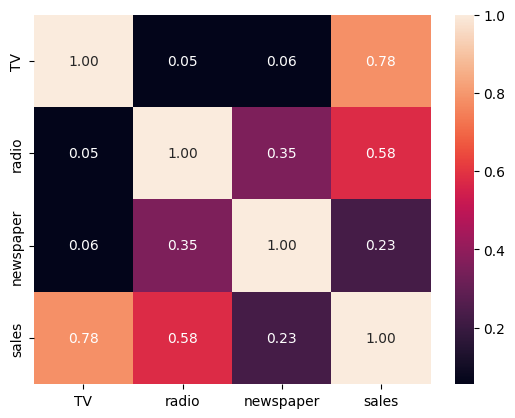

In [ ]:
# Calculate correlations
corr = df.corr()

# Heatmap
sns.heatmap(corr,  annot=True, fmt=".2f")

* ↑ ヒートマップからわかるように、変数TVは売上高と最も相関があるようです。
* ↑ As is visible from the heatmap, the variable TV seems to be most correlated with Sales.

* df.iloc[行番号の指定, 列番号の指定]
* コロン（ : ）は全行抽出することを意味する。カンマの後ろには抽出する列番号を指定する。
* 参考：https://mathnyumon.com/pandas-iloc/
* [:-1]は最後以外を取得する
---
* df.iloc[specify row number, specify column number].
* A colon ( : ) means that all rows are extracted. After the comma, specify the column number to be extracted.
* Reference: https://mathnyumon.com/pandas-iloc/
* [:-1] gets all but the last one.

In [ ]:
# 説明変数と目的変数を設定/Set the explanatory variables and the target variable

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
#2 訓練データと評価データに分割/Split into training data and test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y , test_size = 0.2, random_state = 42)

sklearn.model_selection.train_test_split: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

In [ ]:
#3 モデル選択 -> 線形回帰/Select model -> Linear regression

from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True) #線形回帰クラスのインスタンスを生成/Create an instance of the linear regression class

#4 学習/Learning
# 学習するには、生成したmodelインスタンスからfit()メソッドを呼ぶ
# To learn, call the fit() method from the generated model instance

regressor.fit(X_train, y_train) #fit()メソッドに訓練データを与えて学習させる/Training data is given to the fit() method for training

LinearRegression()

In [ ]:
print(f"Linear coefficients : {regressor.coef_}")
print(f"Intercept : {regressor.intercept_}")

Linear coefficients : [0.04472952 0.18919505 0.00276111]
Intercept : 2.979067338122631


In [ ]:
#5 評価データを使った予測/Predict using test data
# predict()メソッドに説明変数を与えてターゲットを予測
# Predict a target by giving an explanatory variable to the predict() method

y_pred = regressor.predict(X_test)

sklearn.metrics.mean_squared_error: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
* scikit-learnのライブラリを用いて、回帰モデルの予測精度を評価します。
* 二乗平均平方根誤差 (Root Mean Squared Error: RMSE) は予測モデルの評価に用いられます。
---
* Using the scikit-learn library, we evaluate the predictive accuracy of regression models.
* Root Mean Squared Error (RMSE) is used to evaluate the predictive model.

In [ ]:
#6 モデルの評価/Evaluate the model
# RMSE

from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 1.7815996615334502


指標の見方/How to read the indicators
* RMSE: 0に近いほど良い。
* RMSE: The closer to 0, the better.

sklearn.metrics.r2_score: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
* scikit-learnのライブラリを用いて、回帰モデルの予測精度を評価します。
* 決定係数 (R2, R-squared) は、モデルの当てはまりの良さを示す指標で、最も当てはまりの良い場合、1.0 となります (当てはまりの悪い場合、マイナスとなることもあります)。
---
* Using the scikit-learn library, we evaluate the predictive accuracy of regression models.
* The coefficient of determination (R2, R-squared) is a measure of the goodness of fit of the model and is 1.0 for the best fit (can be negative for a poor fit).

In [ ]:
#6 モデルの評価/Evaluate the model
# R-squared

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.899438024100912

指標の見方/How to read the indicators
* R-squared: 1に近いほど良い。
* R-squared: The closer to 1, the better.